# Classification Models

Selain dua algoritma classification yang sudah kita bahas dan implementasi di kelas sebelum (Logistic Regression dan KNN), masih ada banyak algoritma classification lainnya. Di kesempatan kali ini kita akan bagas 4 algoritma berikut.

1. Naive Bayes
2. Decision Tree
3. Random Forest
4. Support Vector Machine (SVM)

Kita mulai dari konsep, lalu kita demo implementasi menggunakan data riil.

## Naive Bayes

konsep naive bayes bergantung pada perhitungan probabilitas suatu hal terjadi, dengan asumsi kalau fitur satu sama lain itu independen. kita gunakan rumus probabilitas buatan Bayes.

contohnya, kita punya data berikut:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# dataset contoh

weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy',
           'Sunny', 'Overcast', 'Overcast', 'Rainy']

play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

df_cuaca = pd.DataFrame({'weather':weather, 'play':play})
df_cuaca

,weather,play
0,Sunny,No
1,Sunny,No
2,Overcast,Yes
3,Rainy,Yes
4,Rainy,Yes
5,Rainy,No
6,Overcast,Yes
7,Sunny,No
8,Sunny,Yes
9,Rainy,Yes


di dataset ini ada 14 poin data, 1 fitur (cuaca/ weather), 1 target (play/ bermain atau tidak).

Dari data ini kita mau membuat prediksi apakah orang ini akan main/ tidak tergantung dari cuacanya.

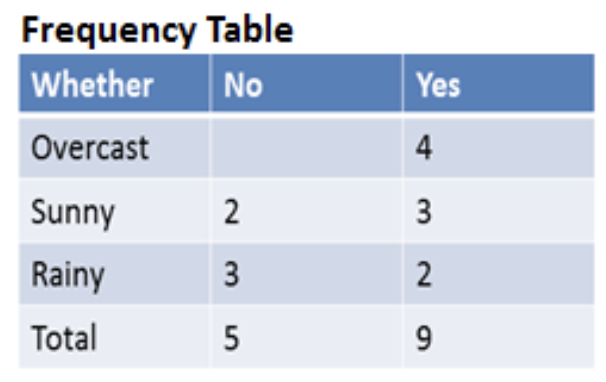

setelah kita buat frequency table yang menghitung untuk setiap unique feature, ada berapa count setiap unique target nya.

kita buat juga likelihood table, meghitung kemungkinan (dari data) suatu kejadian terjadi.

likelihood table 1 berikut, mengihitung:
- di sebelah kanan, berapa % dari data yang Overcast, Sunny, dan Rainy
- di bawahnya, di amenghitung berapa % dari data yang No dan Yes

likelihood table 2 berikut baru dihitung berbarengan.
- berapa % No kalau Overcast. berapa % Yes kalau Overcast.
- berapa % No kalau Sunny. berapa % Yes kalau Sunny.
- berapa % No kalau Rainy. berapa % Yes kalau Rainy.

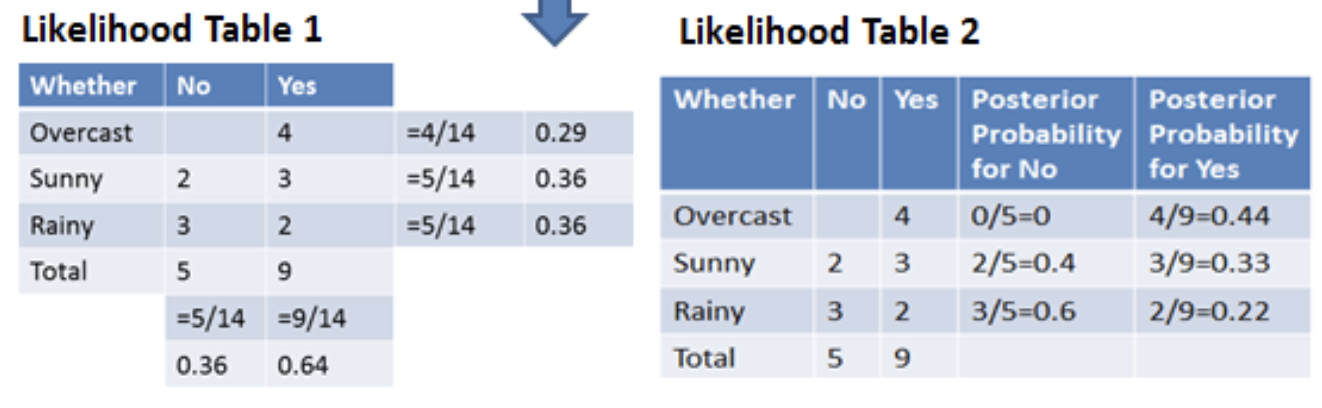

jadi kita punya 5 dan 6 = total 11 angka likelihood berbeda
1. likelihood Overcast (0.29)
2. likelihood Sunny
3. likelihood Rainy
4. likelihood No
5. likelihood Yes (0.64)
6. likelihood No if Overcast
7. likelihood Yes if Overcast (0.44)
8. likelihood No if Sunny
9. likelihood Yes if Sunny
10. likelihood No if Rainy
11. likelihood Yes if Rainy

kalau sudah, kita lanjut ke membuat prediksi. Kita hitung probabilitas menggunakan angka likelihood dan rumus bayes

Misalnya, berapa probabilitas Yes if Overcast

(Yes | Overcast) = (Overcast | Yes) * (Yes) / (Overcast)
                 = 0.44 * 0.64 / 0.29

In [ ]:
0.44 * 0.64 / 0.29

0.9710344827586208

Kalau teori Naive Bayes kurang lebih sudah bisa dipahami, berikut kita implementasi.

Kita gunakan data yang sama ditambah satu fitur lagi, temperatur.

In [ ]:
df_cuaca['temp'] = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

df_cuaca

,weather,play,temp
0,Sunny,No,Hot
1,Sunny,No,Hot
2,Overcast,Yes,Hot
3,Rainy,Yes,Mild
4,Rainy,Yes,Cool
5,Rainy,No,Cool
6,Overcast,Yes,Cool
7,Sunny,No,Mild
8,Sunny,Yes,Cool
9,Rainy,Yes,Mild


In [ ]:
df_cuaca_en = df_cuaca.copy()

In [ ]:
# buat model Naive Bayes prediksi main/tidak (play Yes atau No)
# karena datanya text semua kita perlu encoding
# karena data text nya memiliki urutan, baiknya kita encoding dengan Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[['Sunny', 'Overcast', 'Rainy']])
df_cuaca_en['weather'] = enc.fit_transform(df_cuaca[['weather']])

print(enc.categories_)

[array(['Sunny', 'Overcast', 'Rainy'], dtype=object)]


In [ ]:
enc = OrdinalEncoder(categories=[['Cool', 'Mild', 'Hot']])
df_cuaca_en['temp'] = enc.fit_transform(df_cuaca[['temp']])

print(enc.categories_)

[array(['Cool', 'Mild', 'Hot'], dtype=object)]


In [ ]:
enc = OrdinalEncoder(categories=[['No', 'Yes']])
df_cuaca_en['play'] = enc.fit_transform(df_cuaca[['play']])

print(enc.categories_)

[array(['No', 'Yes'], dtype=object)]


In [ ]:
df_cuaca_en

,weather,play,temp
0,0.0,0.0,2.0
1,0.0,0.0,2.0
2,1.0,1.0,2.0
3,2.0,1.0,1.0
4,2.0,1.0,0.0
5,2.0,0.0,0.0
6,1.0,1.0,0.0
7,0.0,0.0,1.0
8,0.0,1.0,0.0
9,2.0,1.0,1.0


In [ ]:
# data yang sudah selesai di encoding kita pisahkan fitur dan target
X = df_cuaca_en[['weather', 'temp']]
y = df_cuaca_en['play']


# kita buat model ML nya, pakai Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X, y)

GaussianNB()

In [ ]:
# model yang sudah jadi bisa kita gunakan untuk membuat prediksi.
# misalnya, saat cuaca hujan Rainy dan temp dingin Cool, apakah orang ini akan bermain play Yes?

# model_NB.predict([['Rainy', 'Cool']])
model_NB.predict([[2, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1.])

hasil prediksi 1, artinya Yes. model kita memprediksi orang ini akan bermain saat cuaca Rainy dan temp Cool.

In [ ]:
# evaluasi model

# kita gunakan confusion matrix dan classification report
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def visualCM(cm, jumlah_target, label_target=range(5), graph_title=""):
  fig, ax = plt.subplots(figsize=(jumlah_target/2, jumlah_target/2))
  ax.imshow(cm)
  ax.grid(False)
  ax.set_xlabel('Predicted outputs', color='black')
  ax.set_ylabel('Actual outputs', color='black')
  ax.xaxis.set_ticks(label_target)
  ax.yaxis.set_ticks(label_target)
  ax.set_ylim(jumlah_target-0.5, -0.5)
  ax.set_title(graph_title)
  for i in range(jumlah_target):
    for j in range(jumlah_target):
      ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.show()

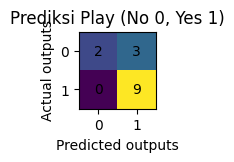

In [ ]:
y_pred = model_NB.predict(X)

cm = confusion_matrix(y, y_pred)

visualCM(cm, 2, [0, 1], 'Prediksi Play (No 0, Yes 1)')

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57         5
         1.0       0.75      1.00      0.86         9

    accuracy                           0.79        14
   macro avg       0.88      0.70      0.71        14
weighted avg       0.84      0.79      0.76        14



Coba sekali lagi, dengan dataset riil yang lebih besar.

misalnya, data tentang penggunaan HP dari [kaggle](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset) diambil raw filenya dari github https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/user_behavior_dataset.csv

In [ ]:
# import data

df_mobile = pd.read_csv("https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/user_behavior_dataset.csv")
df_mobile.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
df_mobile_en = df_mobile.copy()

In [ ]:
# skip cek missing values, karena tidak ada missing values

In [ ]:
# kolom Device Model, Operating System, dan Gender bisa kita encoding
# karena tidak ada urutan kita bisa gunakan LabelEncoder

le = LabelEncoder()
df_mobile_en['Device Model'] = le.fit_transform(df_mobile['Device Model'])
print("Device Model", le.classes_)


le = LabelEncoder()
df_mobile_en['Operating System'] = le.fit_transform(df_mobile['Operating System'])
print("Operating System", le.classes_)


le = LabelEncoder()
df_mobile_en['Gender'] = le.fit_transform(df_mobile['Gender'])
print("Gender", le.classes_)

Device Model ['Google Pixel 5' 'OnePlus 9' 'Samsung Galaxy S21' 'Xiaomi Mi 11'
 'iPhone 12']
Operating System ['Android' 'iOS']
Gender ['Female' 'Male']


In [ ]:
# cek kolom ada apa saja

df_mobile.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [ ]:
# pisahin fitur dan target
# misalnya kita mau prediksi User Behavior Class berdasarkan kolom kolom tertentu
X = df_mobile_en[['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)']]
y = df_mobile_en['User Behavior Class']

# kebetulan data yang kita encoding tidak digunakan - kalian boleh gunakan kalau mau, untuk fitur dan target berbeda

In [ ]:
y.unique()

array([4, 3, 2, 5, 1])

In [ ]:
# selesai encoding kita bisa lakukan split data jadi train dan test dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(525, 5)
(175, 5)
(525,)
(175,)


In [ ]:
# buat model

model_hp_NB = GaussianNB()
model_hp_NB.fit(X_train, y_train)

GaussianNB()

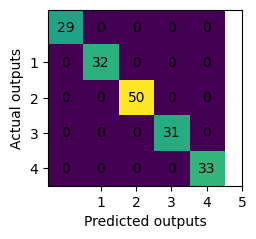

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [ ]:
# selesai latih model, kita evaluasi

y_pred = model_hp_NB.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
visualCM(cm, 5, [1,2,3,4,5])

print(classification_report(y_test, y_pred))

## Decision Tree
satu pohon

menanyakan 1 pertanyaan, lalu datanya dibagi dua, antara yang jawab iya/ tidak.

## Random Forest
banyak pohon jadi hutan

kita buat 100 pohon secara random, pertanyaan root node nya beda beda, dan dari 100 pohon tersebut, kita voting setiap mau buat prediksi. kalau mayoritas pohon memprediksi kategori A, maka kita ikuti mayoritas, dan model nya memprediksi kategori A.

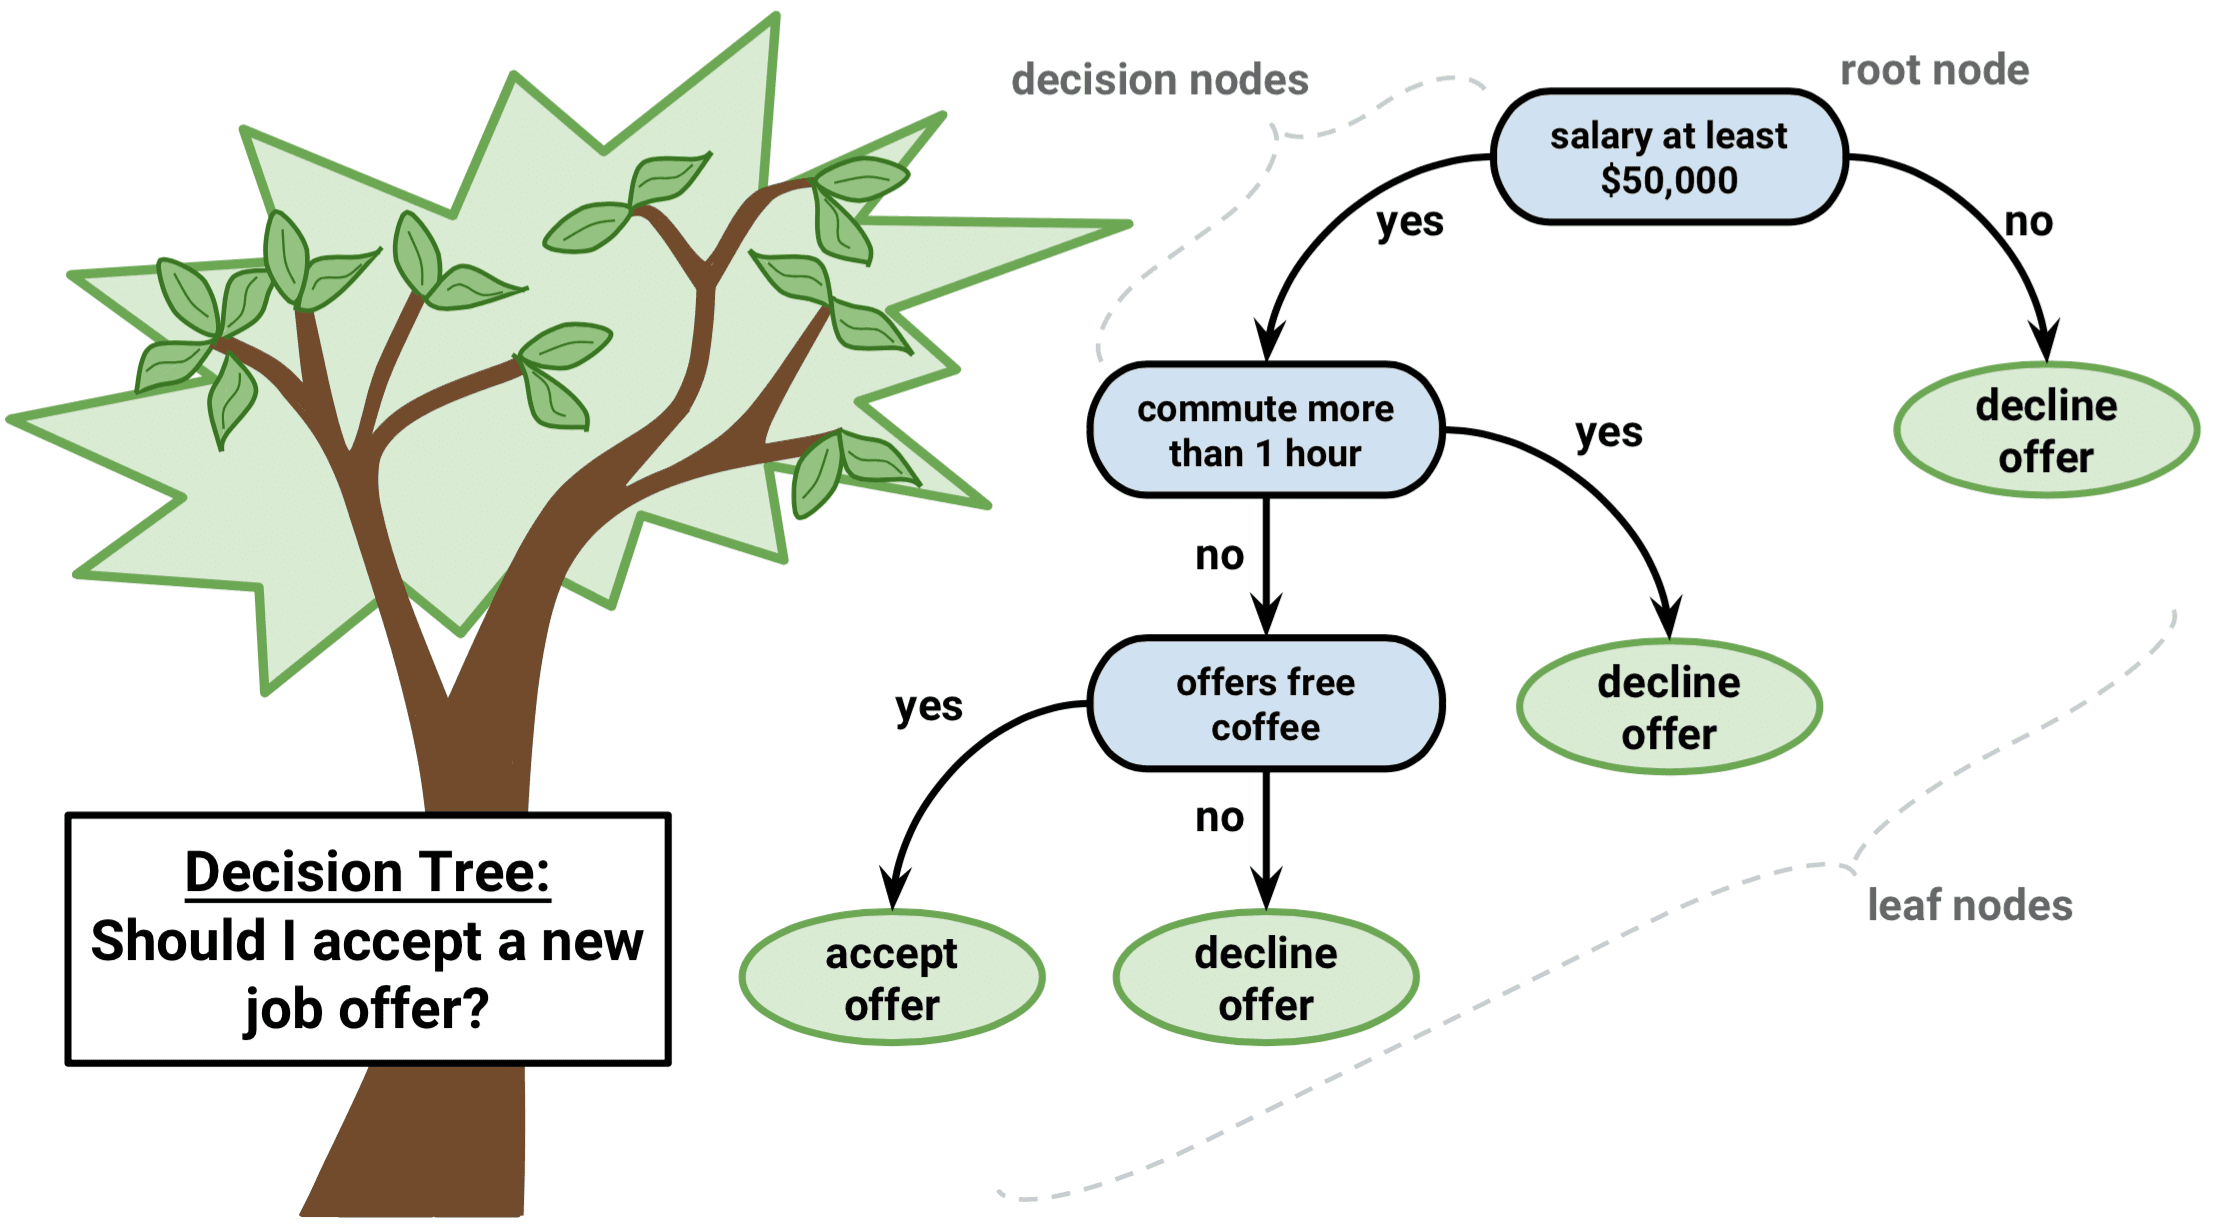

di contoh di atas, kita memiliki data banyak pekerjaan dengan 3 fitur:
- salary (jumlah gaji)
- commute (jumlah waktu untuk ke kantor)
- free_coffee (ya/tidak ada kopi gratis di kantor)

di contoh di atas, kita memiliki 2 jenis target:
- accept (terima kerjaan)
- decline (tolak kerjaan)

decision tree membuat pertanyaan pertama: jumlah gaji apakah diatas 50rb USD?
- kalau iya, kita lanjut ke pertanyaan berikut --- karena datanya masih tercampur ada yang "accept" ada yang "decline"
- kalau tidak, semua data yang menjawab tidak, memiliki target "decline"

konsep decision tree yang ideal adalah dia terus bertanya sampai semua "daun" nya memiliki target yang sama. jadi kalau ada data baru, kita tinggal ikuti pertanyaan2nya, untuk sampai ke "daun" dan kita bisa prediksi target data baru tersebut.

### kita gunakan dataset tentang obesitas untuk contoh kali ini

https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/Obesity_Dataset.xlsx

In [ ]:
pd.ExcelFile("https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/Obesity_Dataset.xlsx").sheet_names

['Obesity_Dataset ', 'Explanation', 'Citation_Request']

In [ ]:
# import data
df_obes = pd.read_excel("https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/Obesity_Dataset.xlsx")
df_obes.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [ ]:
df_obes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  Schedule_Dedicated_t

In [ ]:
# skip data cleaning

In [ ]:
df_obes.columns

Index(['Sex', 'Age', 'Height', 'Overweight_Obese_Family',
       'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking',
       'Liquid_Intake_Daily', 'Calculation_of_Calorie_Intake',
       'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
       'Type_of_Transportation_Used', 'Class'],
      dtype='object')

misalnya kita mau gunakan 'Sex', 'Age', 'Height', 'Overweight_Obese_Family' dan 'Consumption_of_Fast_Food', untuk prediksi kelas orang ini (underweight, normal, overweight, obese)

In [ ]:
# pilih fitur dan target
X = df_obes[['Sex', 'Age', 'Height', 'Overweight_Obese_Family',
       'Consumption_of_Fast_Food']]
y = df_obes['Class']

In [ ]:
y.unique()

array([2, 3, 4, 1])

In [ ]:
# split train test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1207, 5)
(403, 5)
(1207,)
(403,)


In [ ]:
# bikin model

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


model_obes_Tree = DecisionTreeClassifier(max_depth=15) # biasanya sering kita set max_depth ke level tertentu
model_obes_Tree.fit(X_train, y_train)


model_obes_Forest = RandomForestClassifier(max_depth=15) # biasanya sering kita set max_depth ke level tertentu
model_obes_Forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15)

Decision Tree


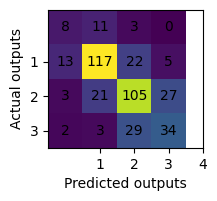

              precision    recall  f1-score   support

           1       0.31      0.36      0.33        22
           2       0.77      0.75      0.76       157
           3       0.66      0.67      0.67       156
           4       0.52      0.50      0.51        68

    accuracy                           0.66       403
   macro avg       0.56      0.57      0.57       403
weighted avg       0.66      0.66      0.66       403



In [ ]:
# evaluasi model

print("Decision Tree")
y_pred = model_obes_Tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
visualCM(cm, 4, y.unique())

print(classification_report(y_test, y_pred))

Random Forest


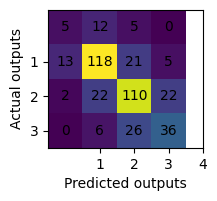

              precision    recall  f1-score   support

           1       0.25      0.23      0.24        22
           2       0.75      0.75      0.75       157
           3       0.68      0.71      0.69       156
           4       0.57      0.53      0.55        68

    accuracy                           0.67       403
   macro avg       0.56      0.55      0.56       403
weighted avg       0.66      0.67      0.67       403



In [ ]:
# evaluasi model

print("Random Forest")
y_pred = model_obes_Forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
visualCM(cm, 4, y.unique())

print(classification_report(y_test, y_pred))

Model tipe Random Forest memiliki keuntungan untuk mengetahui fitur mana yang paling berpengaruh ke target. Fitur mana yang kalau berubah paling mempengaruhi targetnya berubah juga.

### Feature Importances
fitur mana yang paling penting



In [ ]:
model_obes_Forest.feature_importances_

array([0.0495137 , 0.52633426, 0.32727573, 0.04219022, 0.05468608])

angka angka ini adalah persentase seberapa pentingnya fitur ini ke pemilihan target

In [ ]:
df_importances = pd.DataFrame(
    model_obes_Forest.feature_importances_,
    index=['Sex', 'Age', 'Height', 'Overweight_Obese_Family','Consumption_of_Fast_Food'],
    columns=["Feature Importance"]
    ).sort_values(by="Feature Importance")
df_importances

,Feature Importance
Overweight_Obese_Family,0.042190
Sex,0.049514
Consumption_of_Fast_Food,0.054686
Height,0.327276
Age,0.526334


<Axes: >

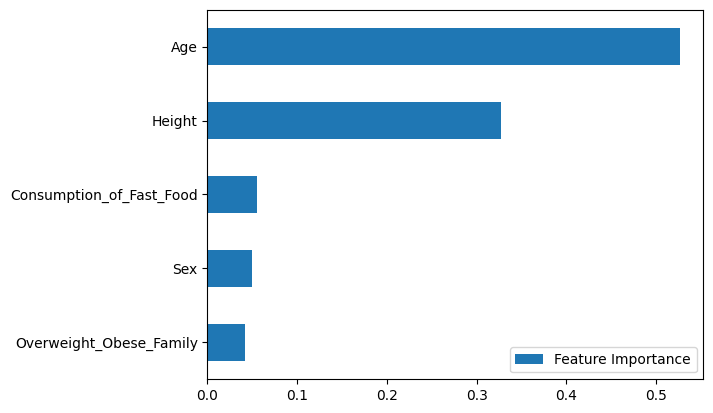

In [ ]:
df_importances.plot(kind="barh")

yang tidak teralu penting fiturnya mungkin boleh kita hapus saja. atau kita gantikan kolom lain untuk cek apakah ada kolom yang lebih berpengaruh.

## Support Vector Machine

Ini adalah algoritma yang paling berat yang kita bahas hari ini, yang menggunakan gabungan teknik regression dan knn. dia juga bisa digunakan untuk prediksi data continuous/discrete, jadi bisa diterapkan sebagai model ML tipe Regression maupun Classification.


SVM mencoba membuat pemisah dengan:
- margin maximal antara
- support vector (titik terdekat dari masing masing kategori target ke pemisahnya)

cara hitung margin dari support vector ke pemisah ditarik garis lurus, ketemunya pas di 90 derajat (2D)

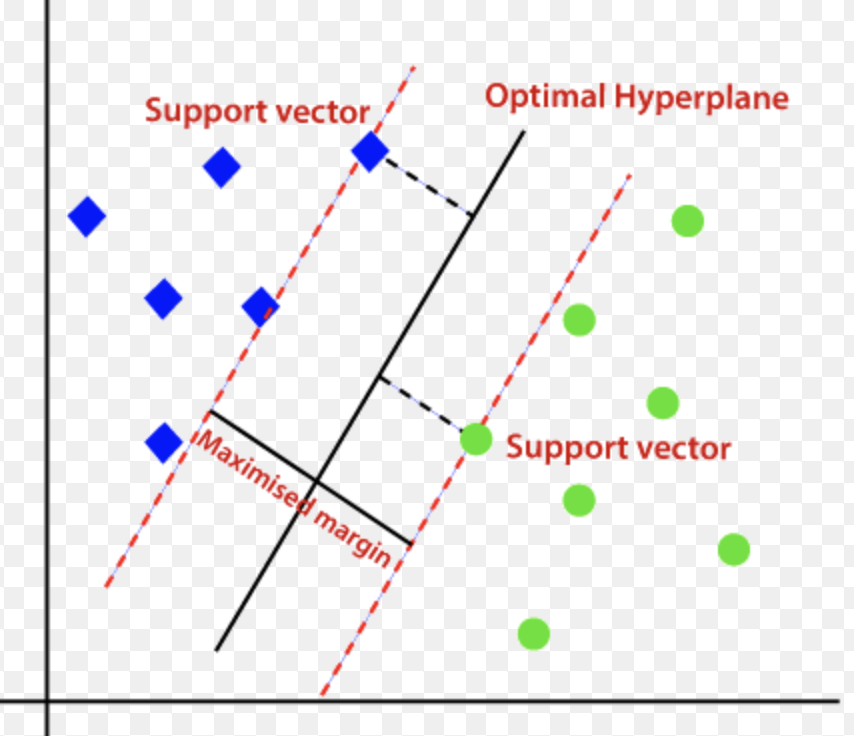

kalau datanya sudah terpisah seperti diatas, kita bisa bayangkan mencari pemisah yang baik bisa dilakukan.

tapi bagaimana kalau datanya tercampur?

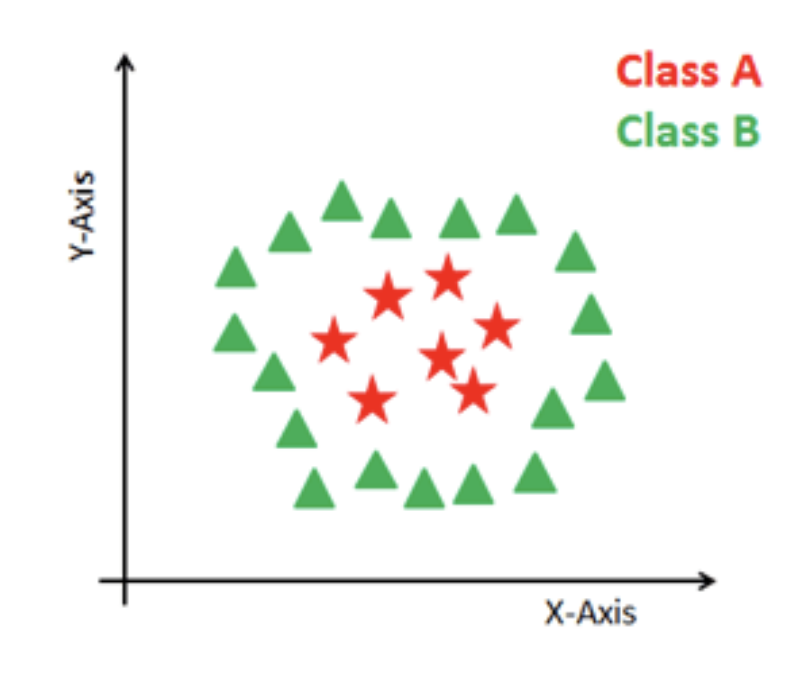

kita tidak bisa tarik garis pemisah dari data diatas. kita bahkan tidak bisa pilih support vector class A dan class B yang mana.

tapi SVM bisa diterapkan, dengan kita tambahkan satu langkah "kernel"

kita menambahkan dimensi ke datanya.

contohnya, data diatas kalau kita konversi menjadi 3 dimensi, kita bisa pisahkan class A dan class B. berikut data diatas yang sudah dipisah - kita lihat datanya dari dimensi ke-tiga, axis Z

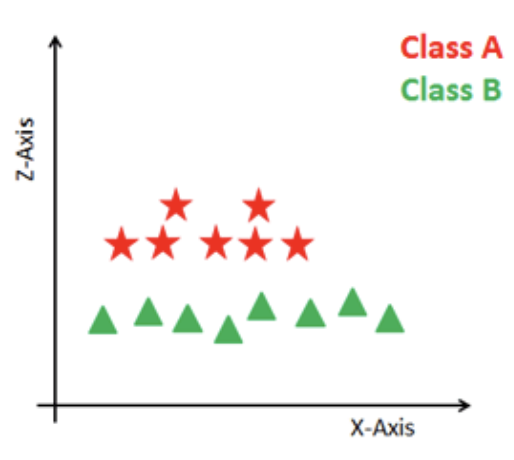

selain menambah dimensi, kita terapkan formula "kernel" untuk mengubah datanya. Sehingga dengan "kernel" yang tepat, kita selalu bisa memisahkan datanya. jadi bisa diterapkan SVM.

```python
model_SVM = SVC(kernel='rbf')
```

In [ ]:
# siapkan data

df_obes = pd.read_excel("https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/Obesity_Dataset.xlsx")
df_obes.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [ ]:
df_obes.shape

(1610, 15)

In [ ]:
df_obes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  Schedule_Dedicated_t

In [ ]:
df_obes.columns

Index(['Sex', 'Age', 'Height', 'Overweight_Obese_Family',
       'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking',
       'Liquid_Intake_Daily', 'Calculation_of_Calorie_Intake',
       'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
       'Type_of_Transportation_Used', 'Class'],
      dtype='object')

In [ ]:
for col in df_obes.columns:
  print(col, df_obes[col].unique())

Sex [2 1]
Age [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54]
Height [155 158 159 162 165 176 152 163 166 181 153 156 157 160 161 164 168 169
 171 175 177 178 174 170 167 172 173 151 154 179 182 186 180 184 183 187
 191 185 188 150 190 193]
Overweight_Obese_Family [2 1]
Consumption_of_Fast_Food [2 1]
Frequency_of_Consuming_Vegetables [3 2 1]
Number_of_Main_Meals_Daily [1 2 3]
Food_Intake_Between_Meals [3 1 2 4]
Smoking [2 1]
Liquid_Intake_Daily [1 3 2]
Calculation_of_Calorie_Intake [2 1]
Physical_Excercise [3 1 2 4 5]
Schedule_Dedicated_to_Technology [3 2 1]
Type_of_Transportation_Used [4 3 2 5 1]
Class [2 3 4 1]
target [1 2 3 0]


In [ ]:
# ubah sedikit Class nya jadi 0-underweight, 1-normal, 2-overweight, 3-obese bukan 1 2 3 4
df_obes['target'] = df_obes['Class'] - 1
df_obes['target'].unique()

array([1, 2, 3, 0])

In [ ]:
# rapikan data
# missing values, invalid values --> skip tidak ada missing atau invalid valus
# encoding --> skip tidak ada data non numerik

# fitur dan target
# misalnya kita mau prediksi 'target' seseorang dari 0-underweight, 1-normal, 2-overweight, 3-obese
y = df_obes['target']
# menggunakan fitur 'Sex', 'Age', 'Height', 'Number_of_Main_Meals_Daily', 'Physical_Excercise'
X = df_obes[['Sex', 'Age', 'Height', 'Number_of_Main_Meals_Daily', 'Physical_Excercise']]

# data splitting, train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1207, 5)
(403, 5)
(1207,)
(403,)


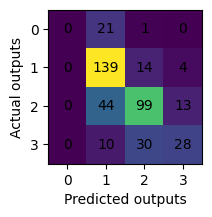

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.65      0.89      0.75       157
           2       0.69      0.63      0.66       156
           3       0.62      0.41      0.50        68

    accuracy                           0.66       403
   macro avg       0.49      0.48      0.48       403
weighted avg       0.62      0.66      0.63       403



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# buat model
# latih model
model_SVM = SVC(kernel='linear', C=10)
model_SVM.fit(X_train, y_train)

# evaluasi model
y_pred = model_SVM.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
visualCM(cm, 4, y.unique())

print(classification_report(y_test, y_pred))

In [ ]:
# gunakan model nya untuk buat prediksi

# dari fitur yang kita gunakan 'Sex', 'Age', 'Height', 'Number_of_Main_Meals_Daily', 'Physical_Excercise'
for col in ['Sex', 'Age', 'Height', 'Number_of_Main_Meals_Daily', 'Physical_Excercise']:
  print(col, df_obes[col].unique())

Sex [2 1]
Age [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54]
Height [155 158 159 162 165 176 152 163 166 181 153 156 157 160 161 164 168 169
 171 175 177 178 174 170 167 172 173 151 154 179 182 186 180 184 183 187
 191 185 188 150 190 193]
Number_of_Main_Meals_Daily [1 2 3]
Physical_Excercise [3 1 2 4 5]


misalnya kita punya:
1. seorang wanita 'Sex' = 2
2. umurnya 25
3. tingginya 170
4. sehari makan 3 kali
5. tidak olahraga Physical_Excercise 1

kita bisa gunakan model untuk prediksi level obesitas orang ini

In [ ]:
model_SVM.predict([[2, 25, 170, 3, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

modelnya memprediksi 1, orang ini normal beratnya